In [1]:
# pickle is a built-in library in Python that allows us to save variables to our hard drive, then load them back 
import pickle as pk
chapters = pk.load(open('wizard_of_oz_stories.pk', 'rb'))
# chapter 1
chapters[0][:100]

In [2]:
len(chapters)

In [3]:
# chapter 2
chapters[1][:100000]

In [4]:
# built-in Python libraries
import string

# you probably need to download stopwords first:
# https://stackoverflow.com/a/41640852/4549682
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')  # might have to use 'en' instead of 'english'
stopwords = set(en_stopwords)

from nltk.stem.porter import PorterStemmer

In [5]:
from collections import Counter

def clean_text(document):
    """
    cleans text for analysis
    
    - lowercases
    - removes punctuation and numbers
    - lemmatizes or stems
    - removes stopwords
    """
    
    #test_string = 'this is a test string'
    #lowercased_string = a_string.lower()
    #test_string.split()
    
    
    # lowercase text
    print('lowercasing')
    # use the .lower method of strings to lowercase the document
    # https://docs.python.org/3/library/stdtypes.html#str.lower
    lowercased_doc = document.lower()
    
    print('removing punctuation/numbers')
    # remove punctuation and numbers using the "String constants" from the string library:
    # https://docs.python.org/3/library/string.html#string-constants
    # do this before stemming, so things like "act's" turn into 'act' instead of 'act s'
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    
    # use the 'translate' method on each of the docs to remove punctuation
    # here is an example: https://stackoverflow.com/a/34294398/4549682
    clean_document = lowercased_doc.translate(table)

    # use the split method of strings to split the document (at spaces) into words:
    # https://docs.python.org/3/library/stdtypes.html#str.split
    # this will also remove extra spaces at the ends and beginnings of words
    words = clean_document.split()
    
    
    # remove stopwords
    print('removing stopwords')
    # this is the list comprehension way to do it
    # clean_document = [w for w in clean_document if w not in stopwords]
    
    clean_words = []
    for w in words:
        # make sure the word is not in the stopword set
        # remember -- we created the 'stopwords' variable in the cell above
        if w not in stopwords:
            clean_words.append(w)
    #count the occurences of each word        

    # stem words -- basically chop off the ends
    print('stemming')
    stemmer = PorterStemmer()
    stems = []
    
    for w in clean_words:
        # stem the word with the stemmer, and add to the 'stems' list:
        # http://www.nltk.org/howto/stem.html
        stems.append(stemmer.stem(w))
        
    for w in words:
        count = Counter(clean_words)
    print (count)
    """
    join tokens back into a single string with the .join() method of strings:
    https://www.tutorialspoint.com/python/string_join.htm
    https://docs.python.org/3/library/stdtypes.html#str.join
    You will want to join the strings with a single space.
    """
    clean_document = ' '.join(stems)
    
    # return the clean document
    return clean_document

In [6]:
chapter0 = clean_text(chapters[0][:100000])
chapter1 = clean_text(chapters[1][:100000])
chapter2 = clean_text(chapters[2][:100000])
chapter3 = clean_text(chapters[3][:100000])
chapter4 = clean_text(chapters[4][:100000])
chapter5 = clean_text(chapters[5][:100000])

#frequency = clean_text(chapters[1][:100])
#print cleaned document
print('your result:', chapter0)
print('your result:', chapter1)
print('your result:', chapter2)
print('your result:', chapter3)
print('your result:', chapter4)
print('your result:', chapter5)
#print the word frequency
#print('word count', frequency)

lowercasing
removing punctuation/numbers
removing stopwords
stemming
Counter({'tiger': 28, 'lion': 26, 'said': 18, 'baby': 17, 'one': 16, 'would': 16, 'im': 12, 'hungry': 11, 'fat': 10, 'people': 9, 'pieces': 9, 'throne': 7, 'little': 7, 'tear': 7, 'woman': 7, 'oz': 6, 'great': 6, 'go': 6, 'eat': 6, 'city': 5, 'sure': 5, 'beasts': 5, 'cowardly': 5, 'away': 5, 'back': 5, 'asked': 5, 'met': 5, 'poor': 5, 'palace': 4, 'ozmas': 4, 'man': 4, 'side': 4, 'two': 4, 'answered': 4, 'babies': 4, 'upon': 4, 'beast': 4, 'right': 4, 'street': 4, 'taste': 4, 'like': 4, 'emerald': 3, 'room': 3, 'crouched': 3, 'beside': 3, 'big': 3, 'better': 3, 'us': 3, 'true': 3, 'enough': 3, 'strong': 3, 'teeth': 3, 'person': 3, 'anyone': 3, 'ill': 3, 'entered': 3, 'many': 3, 'hurt': 3, 'child': 3, 'head': 3, 'dont': 3, 'lost': 3, 'mother': 3, 'much': 3, 'house': 3, 'cruel': 3, 'fairy': 2, 'princess': 2, 'ozma': 2, 'hour': 2, 'day': 2, 'tell': 2, 'around': 2, 'important': 2, 'usually': 2, 'either': 2, 'enormous': 2,

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')
#import to generate word clouds
from wordcloud import WordCloud
#import matplotlib to create a plot of the word cloud
import matplotlib.pyplot as plt
#imports for mask word cloud
from os import path
import os
from PIL import Image
import numpy as np

#directory for data
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

#combining the text fromt the chapters into a singular text
book = (chapter0 + chapter1 + chapter2 + chapter3 + chapter4 + chapter5)

In [8]:
#applying nlp spacy to the book
doc = nlp(book)
#list of words
words = []
#list of parts of speech
pos = []
#print each words part of speech
for word in doc:
    print(word.lower_, word.pos_)
    words.append(word.lower_)
    pos.append(word.pos_)

splendid ADJ
palac PROPN
emerald PROPN
citi PROPN
center PROPN
fairi PROPN
land PROPN
oz PROPN
great ADJ
throne NOUN
room NOUN
princess PROPN
ozma PROPN
ruler PROPN
hour PROPN
day PROPN
sit VERB
throne NOUN
glisten PROPN
emerald PROPN
listen VERB
troubl ADJ
peopl NOUN
sure ADV
tell VERB
around ADP
ozma PROPN
throne PROPN
occas PROPN
group PROPN
import PROPN
personag PROPN
oz PROPN
scarecrow PROPN
jack PROPN
pumpkinhead PROPN
tiktok PROPN
clockwork PROPN
man PROPN
tin PROPN
woodman PROPN
wizard PROPN
oz PROPN
shaggi PROPN
man PROPN
famou PROPN
fairi PROPN
peopl PROPN
littl PROPN
dorothi PROPN
usual ADJ
seat NOUN
ozma NOUN
feet NOUN
crouch ADV
either CCONJ
side NOUN
throne NOUN
two NUM
enorm NOUN
beast NOUN
known VERB
hungri PROPN
tiger PROPN
cowardli PROPN
lion NOUN
two NUM
beast NOUN
ozma PROPN
chief PROPN
guardian PROPN
everyon PROPN
love PROPN
beauti PROPN
girl PROPN
princess PROPN
never ADV
disturb VERB
great ADJ
throne NOUN
room NOUN
anyth PROPN
guardian PROPN
look PROPN
fierc PROP

In [9]:
import pandas as pd
#dataframe of words and their associated parts of speech
df = pd.DataFrame({'word:': words, 'pos': pos})
df.head()

,word:,pos
0,splendid,ADJ
1,palac,PROPN
2,emerald,PROPN
3,citi,PROPN
4,center,PROPN


In [10]:
#count of each part of speech occurence
df['pos'].value_counts()

PROPN    1907
NOUN     1502
VERB      987
ADJ       523
ADV       166
AUX       135
NUM        96
PRON       77
SCONJ      64
ADP        57
PART       41
INTJ       24
CCONJ       7
DET         3
X           1
Name: pos, dtype: int64

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
#count 2 grams
vectorizer = CountVectorizer(ngram_range = (2,2))
counts = vectorizer.fit_transform([(chapter0 + chapter1 + chapter2 + chapter3 + chapter4 + chapter5)])
counts.todense()

matrix([[1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [13]:
book_counts = np.array(counts.todense()).flatten()
book_counts

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [14]:
#output of the 2 grams
vectorizer.vocabulary_

{'splendid palac': 4009,
 'palac emerald': 3076,
 'emerald citi': 1189,
 'citi center': 698,
 'center fairi': 656,
 'fairi land': 1305,
 'land oz': 2300,
 'oz great': 3005,
 'great throne': 1738,
 'throne room': 4348,
 'room princess': 3533,
 'princess ozma': 3273,
 'ozma ruler': 3057,
 'ruler hour': 3561,
 'hour day': 1959,
 'day sit': 959,
 'sit throne': 3903,
 'throne glisten': 4345,
 'glisten emerald': 1658,
 'emerald listen': 1190,
 'listen troubl': 2426,
 'troubl peopl': 4572,
 'peopl sure': 3134,
 'sure tell': 4185,
 'tell around': 4251,
 'around ozma': 189,
 'ozma throne': 3063,
 'throne occas': 4347,
 'occas group': 2903,
 'group import': 1765,
 'import personag': 2081,
 'personag oz': 3150,
 'oz scarecrow': 3018,
 'scarecrow jack': 3724,
 'jack pumpkinhead': 2145,
 'pumpkinhead tiktok': 3322,
 'tiktok clockwork': 4386,
 'clockwork man': 731,
 'man tin': 2619,
 'tin woodman': 4433,
 'woodman wizard': 4972,
 'wizard oz': 4910,
 'oz shaggi': 3021,
 'shaggi man': 3819,
 'man famo

In [18]:
#create a frequency dictionary of word grams and their counts
freq_dictionary = {}
for v, i in vectorizer.vocabulary_.items():
    freq_dictionary[v] = book_counts[i]
#view the frequency dictioanry output    
freq_dictionary

{'splendid palac': 2,
 'palac emerald': 2,
 'emerald citi': 11,
 'citi center': 1,
 'center fairi': 2,
 'fairi land': 2,
 'land oz': 9,
 'oz great': 1,
 'great throne': 2,
 'throne room': 3,
 'room princess': 1,
 'princess ozma': 7,
 'ozma ruler': 2,
 'ruler hour': 1,
 'hour day': 1,
 'day sit': 1,
 'sit throne': 1,
 'throne glisten': 1,
 'glisten emerald': 1,
 'emerald listen': 1,
 'listen troubl': 1,
 'troubl peopl': 1,
 'peopl sure': 1,
 'sure tell': 1,
 'tell around': 1,
 'around ozma': 1,
 'ozma throne': 1,
 'throne occas': 1,
 'occas group': 1,
 'group import': 1,
 'import personag': 1,
 'personag oz': 1,
 'oz scarecrow': 1,
 'scarecrow jack': 1,
 'jack pumpkinhead': 6,
 'pumpkinhead tiktok': 1,
 'tiktok clockwork': 2,
 'clockwork man': 9,
 'man tin': 1,
 'tin woodman': 18,
 'woodman wizard': 1,
 'wizard oz': 6,
 'oz shaggi': 1,
 'shaggi man': 1,
 'man famou': 1,
 'famou fairi': 1,
 'fairi peopl': 1,
 'peopl littl': 1,
 'littl dorothi': 1,
 'dorothi usual': 1,
 'usual seat': 1,
 

C:\Users\607791\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


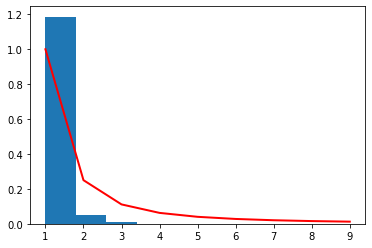

In [35]:
#code assistance obtained from the SciPy reference guide (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.zipf.html)
#zipf plot
import matplotlib.pyplot as plt
from scipy import special
#data
s = book_counts
#distribution parameter
a = 2. 
#visual truncated to 10 for ease of visualization
count, bins, ignored = plt.hist(s[s<10], 10, normed=True)
x = np.arange(1., 10.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y/max(y), linewidth=2, color='r')
plt.show()

What are the top 20 phrases for the 2-grams? Are 3- and 4-grams even useful here?
Top 20 phrases for the 2-grams are tin woodman, nome king, littl wizard, emerald citi, clockwork man, land oz, fat babi, said lion, said tiktok, tin man, clockwork man, princess ozma, hungri tiger!, jack pumpkinhead, littl girl, littl one, wizard oz, cowardli lion, came upon and wash dish. Three and four grams are not useful.

(-0.5, 979.5, 949.5, -0.5)

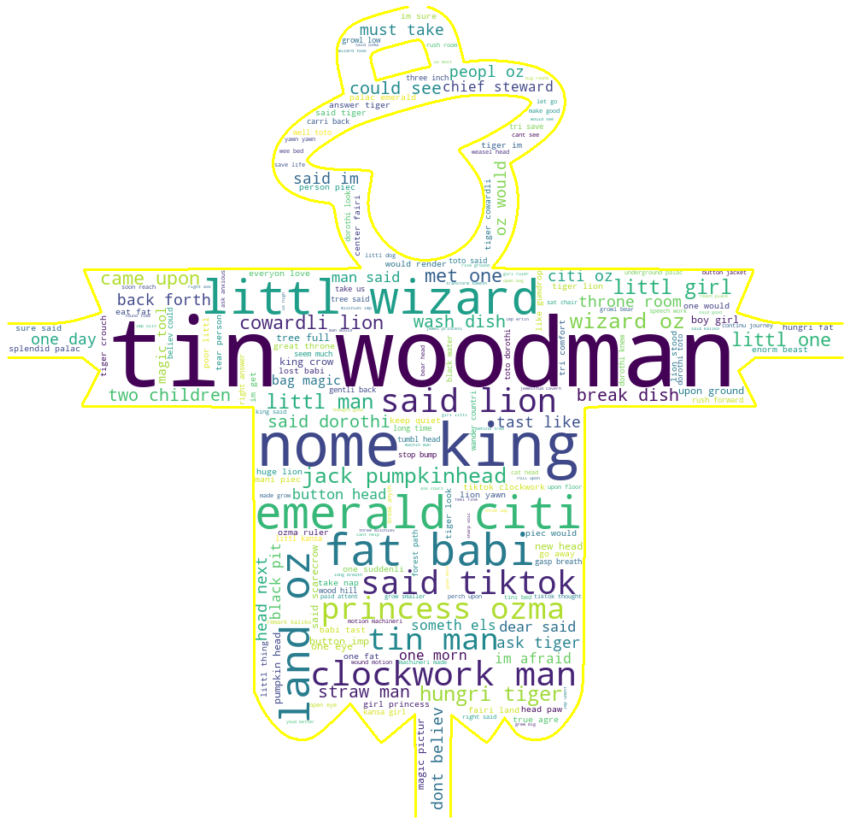

In [36]:
#import wordcloud for the creation of word clouds
import wordcloud
#mask from https://www.pngfly.com/png-qkr6pq/download.html
scarecrow = np.array(Image.open(path.join(d, "Scarecrow.png")))

#word cloud of 2 ngrams with scarecrow mask
wc = wordcloud.WordCloud(background_color="white", mask=scarecrow,
    contour_width=2, contour_color='yellow', max_font_size=120)

#word cloud of the frequency dictioanry
plt.figure(figsize=[15,15])
plt.imshow(wc.generate_from_frequencies(freq_dictionary), interpolation='bilinear')
plt.axis("off")

(-0.5, 979.5, 949.5, -0.5)

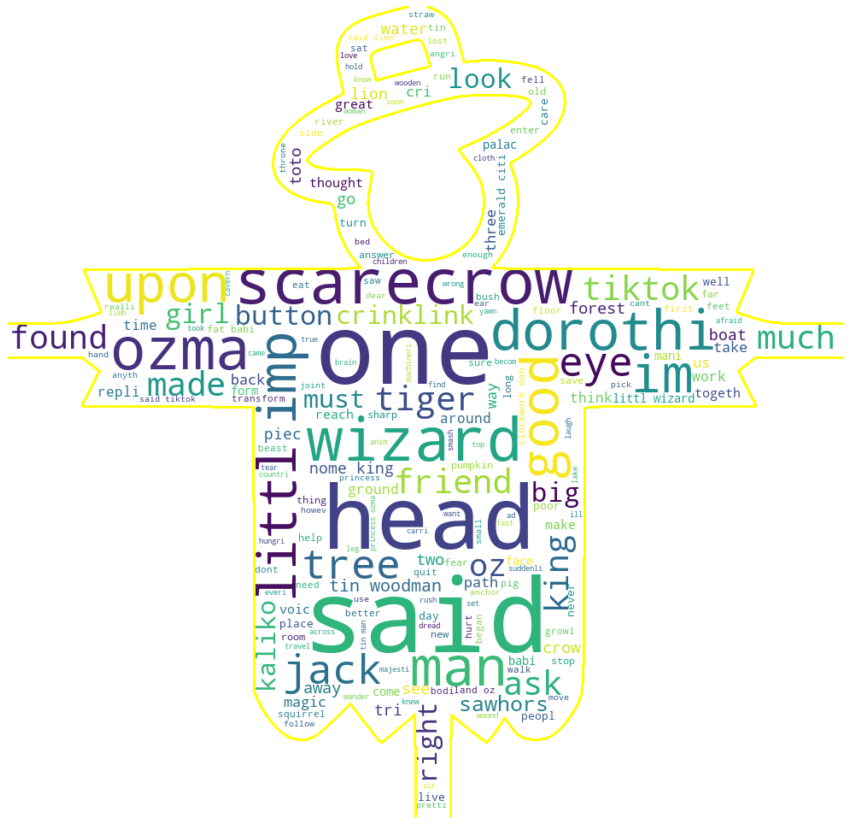

In [22]:
#mask from https://www.pngfly.com/png-qkr6pq/download.html
scarecrow = np.array(Image.open(path.join(d, "Scarecrow.png")))
 
#creating a word cloud of the entire text
wordcloud = WordCloud(background_color="white", mask=scarecrow,
    contour_width=2, contour_color='yellow', max_font_size=120).generate(book)

#set size of the plotted figure
plt.figure(figsize=[15,15])
#plot of wordcloud using bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
#remove the x and y axis from the plot as it serves no purpose but to clutter the image
plt.axis("off")